# Introduction


     The dataset "Car Features and MSRP" describes almost 12 000 car models from more than 20 different brands.The aim of this project is   to  compare between the highest and the lowest manufacturer's suggested retail price (MSRP) cars and analyze their differences based on their features:


              Make   = Cars brands
              Model  = Cars Models
              Year   = Year of cars production 
              Engine HP  = Engine Horsepower
              highway MPG  = how far the car is able to travel for every gallon of fuel it uses in the highway.
              city mpg  = how far the car is able to travel for every gallon of fuel it uses around the city. 
              MSRP = manufacturer's suggested retail price
              Engine Fuel Type 
              Engine Cylinders
              Transmission Type
              Driven Wheels
              Number of Doors
              Market Category
              Vehicle Size         
              Vehicle Style               
              Popularity           
         
         
        * MPG stands for miles per gallon


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import missingno as msno
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/car.jpg
/kaggle/input/cardataset/data.csv


In [2]:
car=pd.read_csv('/kaggle/input/cardataset/data.csv')

In [3]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
plt.style.use('seaborn')
fig= plt.figure(figsize=(16,10))

Market=car['Market Category'].value_counts().head(8).to_frame()
market= Market.style.background_gradient(cmap='Reds')
market



,Market Category
Crossover,1110
Flex Fuel,872
Luxury,855
"Luxury,Performance",673
Hatchback,641
Performance,601
"Crossover,Luxury",410
"Luxury,High-Performance",334


<Figure size 1152x720 with 0 Axes>

 Most of the cars  belong to the Market Category " Crossover" .

* Before starting any data visualization, we need to check if the dataset has any missing values and clean them all of it has any with **Data Cleaning**

# 1.  Data Cleaning

In [5]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize=(15, 3))
car.isnull().mean()



Make                 0.000000
Model                0.000000
Year                 0.000000
Engine Fuel Type     0.000252
Engine HP            0.005792
Engine Cylinders     0.002518
Transmission Type    0.000000
Driven_Wheels        0.000000
Number of Doors      0.000504
Market Category      0.314084
Vehicle Size         0.000000
Vehicle Style        0.000000
highway MPG          0.000000
city mpg             0.000000
Popularity           0.000000
MSRP                 0.000000
dtype: float64

<Figure size 1080x216 with 0 Axes>

We have 5 features with missing values of various proportions. We can closely see how these missing values are variated in the plot below.

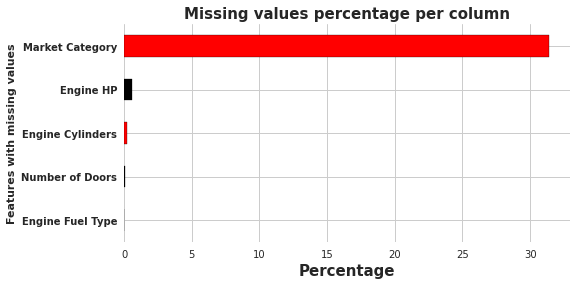

In [6]:
allna = (car.isnull().sum() / len(car))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
plt.figure(figsize=(8, 4))
allna.plot.barh(color=('red', 'black'), edgecolor='black')
plt.title('Missing values percentage per column', fontsize=15, weight='bold' )
plt.xlabel('Percentage', weight='bold', size=15)
plt.ylabel('Features with missing values', weight='bold')
plt.yticks(weight='bold')
plt.show()


The highest feature with missing values has around 32% of NAs which is not that high, this is a good thing since we can go further with data cleaning without dropping any columns, specially the ones that could be useful and helpful in understanding the dataset in the second part: **Data Visualization**

* We start with isolating the missing values to have a better idea on how to treat them.

In [7]:
NA=car[['Engine Fuel Type','Engine HP', 'Engine Cylinders', 'Number of Doors', 'Market Category']]



* We split them to:

    Categorical features
    
    Numerical features



In [8]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 2 categorical features with missing values
We have : 3 numerical features with missing values


* We have 2 categorical features and 3 numerical features to clean.

1. Numerical features

In [9]:
NAnum.head(3)

,Engine HP,Engine Cylinders,Number of Doors
0,335.0,6.0,2.0
1,300.0,6.0,2.0
2,300.0,6.0,2.0


    We can easily clean our numerical features by using the filling forward method since they barely have any missing values.

In [10]:
car['Engine HP']=car['Engine HP'].fillna(method='ffill')
car['Engine Cylinders']=car['Engine Cylinders'].fillna(method='ffill')
car['Number of Doors']=car['Number of Doors'].fillna(method='ffill')

2. Categorical features

In [11]:
NAcat.head(3)

,Engine Fuel Type,Market Category
0,premium unleaded (required),"Factory Tuner,Luxury,High-Performance"
1,premium unleaded (required),"Luxury,Performance"
2,premium unleaded (required),"Luxury,High-Performance"


    Given that Engine Fuel has a very small percentage of missing values, we will clean it using the Fill forward method as well.


     Market Category has a pretty much high amount of missing values, we will clean it by filling it with 'Luxury' assuming that most of the cars belong to the Market category " Crossover".

In [12]:
car['Engine Fuel Type']=car['Engine Fuel Type'].fillna(method='ffill')
car['Market Category']=car['Market Category'].fillna('Crossover')

In [13]:
car.isnull().sum().sort_values(ascending=False).head()



MSRP             0
Popularity       0
city mpg         0
highway MPG      0
Vehicle Style    0
dtype: int64

  * Our dataset is clean, we can now move to ***Data* *visualization***.

# 2. Data Exploration


        2.1  Car brand distribution

In [14]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


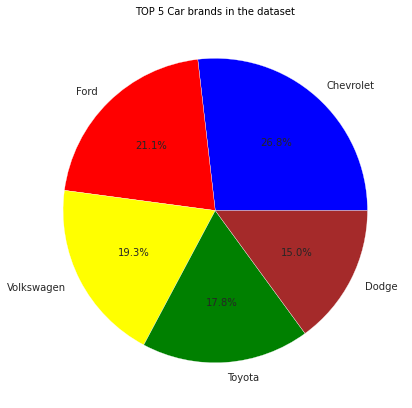

In [15]:
carr=car['Make'].value_counts().head(5).to_frame()
m= carr.style.background_gradient(cmap='Blues')
colors=['blue','red','yellow','green','brown']
labels= ['Chevrolet','Ford','Volkswagen','Toyota','Dodge']
sizes= ['1123','881','809','746','626']
explode=[0.1,0.1,0.1,0.1,0.1]
values=car['Make'].value_counts().head(5).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('TOP 5 Car brands in the dataset',color='black',fontsize=10)
plt.show()



   Chevrolet, Ford, Volkswagen, Toyota and Dodge are the brands most present in our dataset. 

   * Now let's move on to the Brand that has the highest MSRP(manufacturer's suggested retail price)

In [16]:
modelp = car.groupby(['Make']).sum()[['MSRP','Popularity','Engine HP','Engine Cylinders','Number of Doors']].nlargest(10, 'MSRP')
modelp.groupby(['Make']).sum()['MSRP'].nlargest(10).iplot(kind='bar', xTitle='Make', yTitle='MSRP',
                                                                     title='Top 10 expensive Car Brands')

 Chevrolet has the highest manufacturer's suggested retail price (MSRP) value of roughly 33M. What are the feautures that make Cheverolet worth the first ranking?

  In order to answer this question, we will study the Top 5 most 'expensive' model cars of Chevrolet.

In [17]:
Chevrolet=car[car['Make'].str.contains('Chevrolet')]
chev=Chevrolet.sort_values(by=['MSRP'],ascending=False).nlargest(6, 'MSRP')
chevmodel= chev.style.background_gradient(cmap='Greens')
chevmodel

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
3021,Chevrolet,Corvette,2017,premium unleaded (required),650.000000,8.000000,MANUAL,rear wheel drive,2.000000,"Factory Tuner,High-Performance",Compact,Convertible,22,15,1385,92395
2999,Chevrolet,Corvette,2016,premium unleaded (required),650.000000,8.000000,MANUAL,rear wheel drive,2.000000,"Factory Tuner,High-Performance",Compact,Convertible,22,15,1385,92345
2982,Chevrolet,Corvette,2015,premium unleaded (required),650.000000,8.000000,MANUAL,rear wheel drive,2.000000,"Factory Tuner,High-Performance",Compact,Convertible,22,15,1385,91650
3008,Chevrolet,Corvette,2017,premium unleaded (required),650.000000,8.000000,MANUAL,rear wheel drive,2.000000,"Factory Tuner,High-Performance",Compact,Coupe,22,15,1385,88395
2986,Chevrolet,Corvette,2016,premium unleaded (required),650.000000,8.000000,MANUAL,rear wheel drive,2.000000,"Factory Tuner,High-Performance",Compact,Coupe,22,15,1385,88345
2974,Chevrolet,Corvette,2015,premium unleaded (required),650.000000,8.000000,MANUAL,rear wheel drive,2.000000,"Factory Tuner,High-Performance",Compact,Coupe,22,15,1385,87650


  The Corvette model ranks the highest in the manufacturer's suggested retail price (MSRP). If we take a look at the features, The models of all 3 years have the same features except for the Vehicle Style: Convertible Corvette are worth more than Coupe Corvette.
     
  * That leads us to the question: What are the Vehicle Styles out there and which ones are considered to contribute more to the manufacturer's suggested retail price (MSRP)? 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

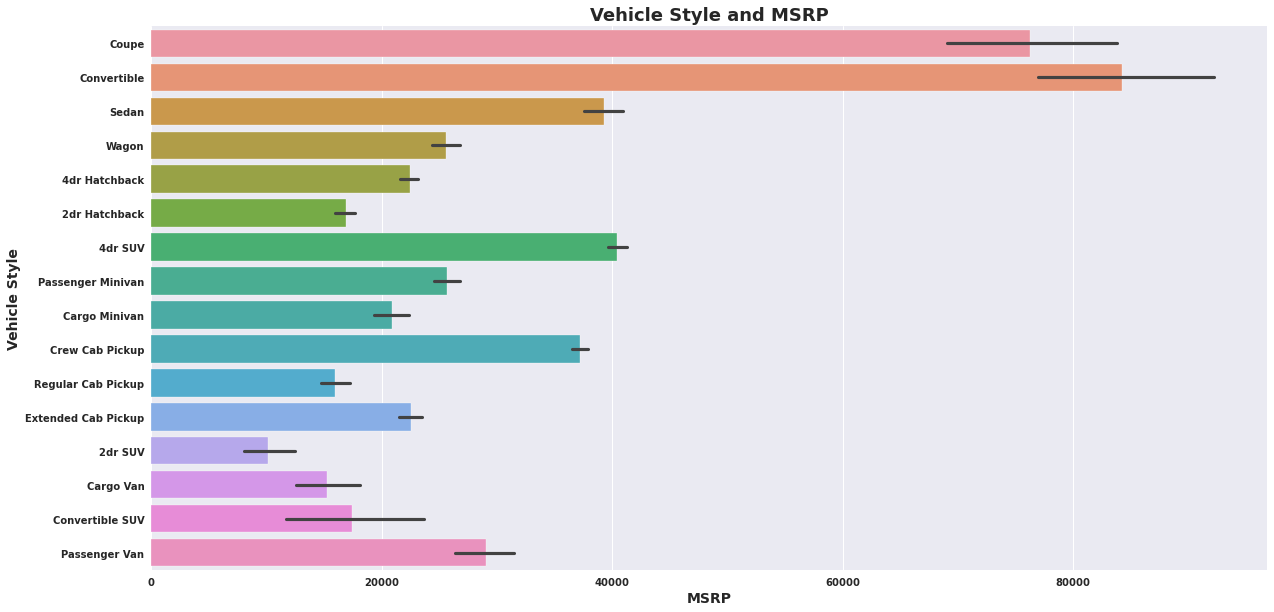

In [18]:
sns.set({'figure.figsize':(20,10)})
VS=sns.barplot(x=car['MSRP'], y=car['Vehicle Style'])
plt.title('Vehicle Style and MSRP', weight='bold', fontsize=18)
plt.xlabel('MSRP', weight='bold',fontsize=14)
plt.ylabel('Vehicle Style', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')



  Coupe, Convertible, 4dr SUV and Sedan styles : Make the model worth more in terms of the manufacturer's suggested retail price (MSRP)
  
  2 dr Suv, Cargo Van, Convertible SUV and 2 dr Hatchback : Make the model worth less in terms of the manufacturer's suggested retail price (MSRP)

* Now that we've seen the most 'expensive' brand ( Chevrolet), Let's move on to the Least 'expensive' brands.

In [19]:
modelp1 = car.groupby(['Make']).sum()[['MSRP','Popularity','Engine HP','Engine Cylinders','Number of Doors']].nsmallest(10, 'MSRP')
modelp1.groupby(['Make']).sum()['MSRP'].nlargest(10).iplot(kind='bar', xTitle='Make', yTitle='MSRP',
                                                                     title='Top 10 least expensive Car Brands')

* We will choose the brand FIAT in order to study the features of the Least expensive brand. 

In [20]:
F=car[car['Make'].str.contains('FIAT')]
FI=F.sort_values(by=['MSRP'],ascending=False).nsmallest(5, 'MSRP')
Fiat= FI.style.background_gradient(cmap='Oranges')
Fiat

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
569,FIAT,500,2017,premium unleaded (recommended),101.000000,4.000000,AUTOMATIC,front wheel drive,2.000000,Hatchback,Compact,2dr Hatchback,33,27,819,15990
552,FIAT,500,2015,premium unleaded (recommended),101.000000,4.000000,MANUAL,front wheel drive,2.000000,Hatchback,Compact,2dr Hatchback,40,31,819,16845
559,FIAT,500,2016,premium unleaded (recommended),101.000000,4.000000,MANUAL,front wheel drive,2.000000,Hatchback,Compact,2dr Hatchback,40,31,819,16995
566,FIAT,500,2017,premium unleaded (recommended),101.000000,4.000000,AUTOMATIC,front wheel drive,2.000000,Crossover,Compact,Convertible,33,27,819,17485
548,FIAT,500,2015,premium unleaded (recommended),101.000000,4.000000,MANUAL,front wheel drive,2.000000,Hatchback,Compact,2dr Hatchback,40,31,819,17495


  Looking at the table above, We can come up with 3 remarks:
     
   1.  The Vehicle Style of the 500 model of FIAT brand is 2dr Hatchback; and as we've seen in the Vehicle Style plot earlier, 2dr Hatchback  is among the styles that make the brand worth less in terms of the manufacturer's suggested retail price ( MSRP).


 
 
  
  2. Some features such as Vehicle Size, Number of doors, and Transmission Type could be interchanged between Chevrolet and Fiat, Which could be interpreted as they have **low correlation with MSPR. Therefore, Which features have a high correlation to manufacturer's suggested retail price (MSRP)?**

  
  
  3. Comparing the Chevrolet and Fiat dataframes, We can notice that the higher the Engine Horsepower is, the shorter the distance the car is able to travel for every gallon of fuel it uses in the highway the city and vice versa. 
         
     Shouldn't cars with a high engine power produce more power and thus have a high highway and city mpg?
 
 


* In order to answer these questions and understand this better, We will see the correlation between the features using a heatmap. 

                                  2. Correlation between Features 

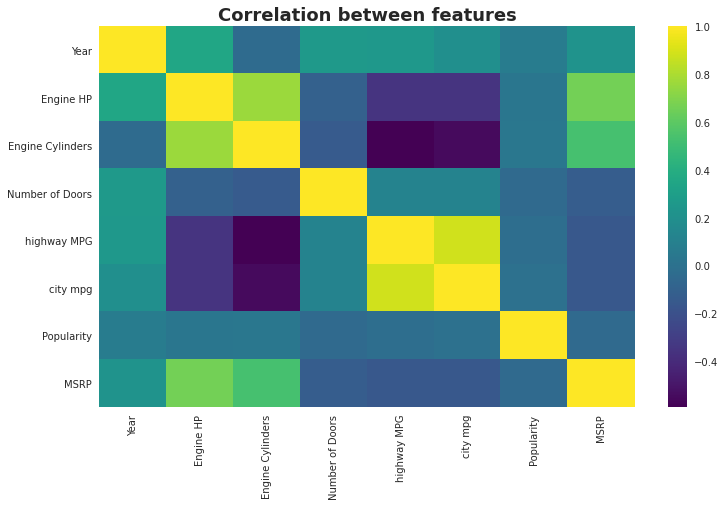

In [21]:
car_corr=car.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(car_corr, cmap='viridis')
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.show()

There is a positive correlation between: 
*  Engine HP and Engine Cylinders
*  Engine HP and the manufacturer's suggested retail price (MSRP)
* Engine Cylinders and the manufacturer's suggested retail price (MSRP)


                                            
                                            

* Let's plot the graphs to have a better understading of these correlations.

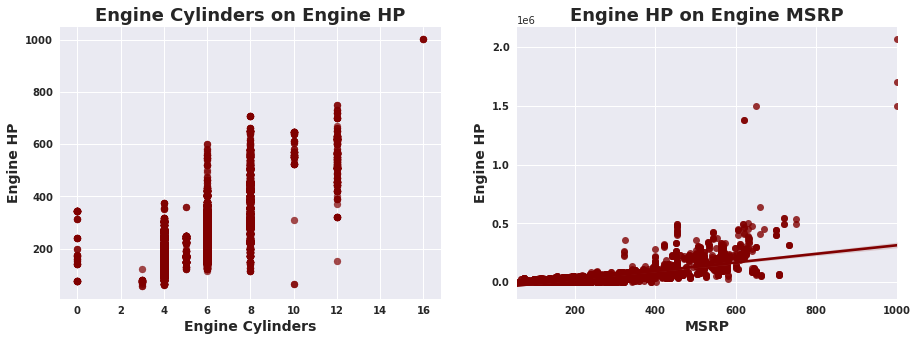

In [22]:
plt.figure(figsize=(15,5))
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=car['Engine Cylinders'], y=car['Engine HP'], color='maroon', alpha=0.7)
plt.title('Engine Cylinders on Engine HP', weight='bold', fontsize=18)
plt.xlabel('Engine Cylinders', weight='bold',fontsize=14)
plt.ylabel('Engine HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')


#first row sec col
ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=car['Engine HP'], y=car['MSRP'], color='maroon')
plt.title('Engine HP on Engine MSRP', weight='bold', fontsize=18)
plt.xlabel('MSRP', weight='bold',fontsize=14)
plt.ylabel('Engine HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

  An engine with more cylinders produces more power, and more power means a high MSRP.

                  3.- Shouldn't cars with a high engine power produce more power and thus have a high highway and city mpg?
                  
         

(array([-100.,  -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,
         350.,  400.]),
 <a list of 11 Text major ticklabel objects>)

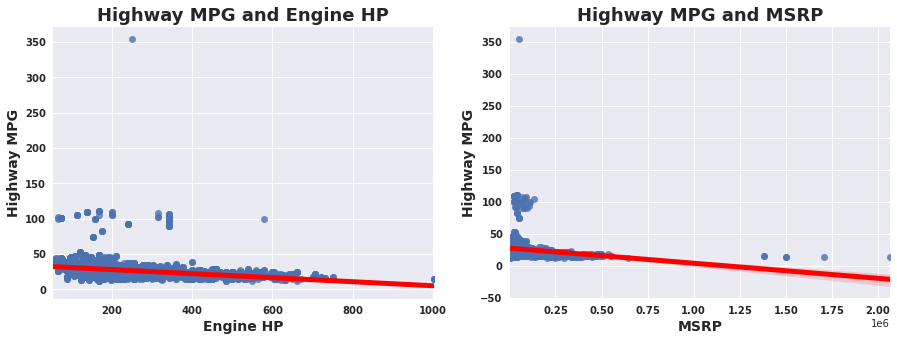

In [23]:
plt.figure(figsize=(15,5))
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.regplot(x=car["Engine HP"], y=car["highway MPG"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('Highway MPG and Engine HP', weight='bold', fontsize=18)
plt.xlabel('Engine HP', weight='bold',fontsize=14)
plt.ylabel('Highway MPG', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#first row sec col
ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=car["MSRP"], y=car["highway MPG"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('Highway MPG and MSRP', weight='bold', fontsize=18)
plt.xlabel('MSRP', weight='bold',fontsize=14)
plt.ylabel('Highway MPG', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

  - Shouldn't cars with a high engine power produce more power and thus have a high highway and city mpg?
  
From both the heatmap and the plots above, we can see a negative correlation between highway and city mpg ( how far the car is able to travel for every gallon of fuel it uses in the highway and around the city) and the Engine HP. 


Horsepower is a measure of **work** that can be performed over a given **time** by an engine. The more power you have the higher the speed you can do it at during **a period of time**. Generally, **higher horsepower** comes from burning more fuel, so get **lower mpg**, more horsepower means less fuel economy.


Basically, race cars and sports cars such as Corvette Have a High Engine Horsepower and a low mpg since they can speed and thus burn more fuel.

Cars like FIAT have a lower Engine Horsepower but a higher mpg since the speed is limited and considered to be more fuel economy.
 

* How are other features correlated to the manufacturer's suggested retail price (MSRP)?

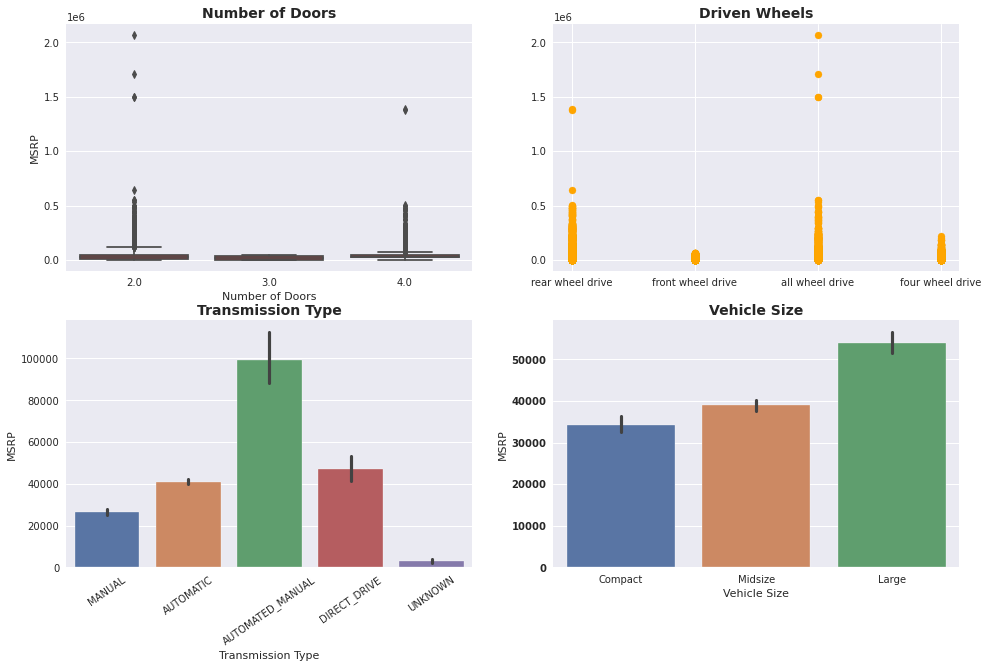

In [24]:

fig= plt.figure(figsize=(16,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.boxplot(x=car['Number of Doors'], y=car['MSRP'],color='Red')
plt.title('Number of Doors', weight='bold', fontsize=14)

#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.scatter(x=car['Driven_Wheels'], y=car['MSRP'], color='Orange')
plt.title('Driven Wheels', weight='bold', fontsize=14)



#Second row first column

ax1 = plt.subplot2grid((2,2), (1, 0))
sns.barplot(x=car['Transmission Type'], y=car['MSRP'])
plt.xticks(rotation=35)
plt.title('Transmission Type', weight='bold', fontsize=14)


#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
sns.barplot(x=car['Vehicle Size'], y=car['MSRP'])

plt.yticks(weight='bold')
plt.title('Vehicle Size', weight='bold', fontsize=14)


plt.show()

What contribute to a High Manufacturer's suggested retail price (MSRP) :
      
      
      - Number of doors : Cars with 2 doors 
      
      
      - Driven Wheels : All wheel drive 
      
      
      - Transmission Type: Automated-Manual (It consists of a conventional manual transmission with an electronically-controlled hydraulic clutch and computerized gear shift control, and the driver can usually override the computer control with a clutchless "manual" mode.)
      
      
      - Vehicle Size: Large
      

* Now that we've see the Highest and lowest brands of cars in terms of the manufacturer's suggested retail price (MSRP). It would be intresting to look for the 5 TOP popular cars and their features.

In [25]:
carmodel = car.groupby(['Make']).sum()[['MSRP','Popularity','Engine HP','Engine Cylinders','Number of Doors']].nlargest(6, 'Popularity')
carmodel.groupby(['Make']).sum()['Popularity'].nlargest(10).iplot(kind='bar', xTitle='Make', yTitle='Popularity',
                                                                     title='Top 5 popular Car Brands')

Ford ranks the 1st popular brand. 

  * In order to study its features, we will select the 3 most popular models of this brand

In [26]:
Ford=car[car['Make'].str.contains('Ford')]
Fordm=Ford.sort_values(by=['Popularity'],ascending=False).nlargest(3, 'MSRP')
Ford2= Fordm.style.background_gradient(cmap='Reds')
Ford2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5602,Ford,GT,2005,premium unleaded (required),550.000000,8.000000,MANUAL,rear wheel drive,2.000000,"Exotic,High-Performance",Compact,Coupe,19,12,5657,149995
5603,Ford,GT,2006,premium unleaded (required),550.000000,8.000000,MANUAL,rear wheel drive,2.000000,"Exotic,High-Performance",Compact,Coupe,19,12,5657,149995
4345,Ford,Expedition,2017,regular unleaded,365.000000,6.000000,AUTOMATIC,four wheel drive,4.000000,Crossover,Large,4dr SUV,19,15,5657,68996


Ford Brand which comparing its manufacturer's suggested retail price (MSRP) to Chevrolet could be very affordable has the least favored features to a high manufacturer's suggested retail price (MSRP) in all : Vehicle Size,Transmission Type, Driven Wheels and Vehicle size ( looking at the plots above). 





* It would be intresting to go over each Engine Fuel Type and compare their miles per gallon (MPG) values to see how fuel economy they are.

In [27]:
EFT=car[['Engine Fuel Type',
      'Engine HP',
      'Engine Cylinders',
      'highway MPG',
         'MSRP',
        'city mpg']].groupby(['Engine Fuel Type']).agg('median').sort_values(by=['Engine HP'],ascending=False)
EFT1= EFT.style.background_gradient(cmap='Purples')
EFT1


,Engine HP,Engine Cylinders,highway MPG,MSRP,city mpg
Engine Fuel Type,,,,,
flex-fuel (premium unleaded required/E85),510.000000,8.000000,19.000000,142547.500000,13.000000
premium unleaded (required),333.000000,6.000000,24.000000,60300.000000,17.000000
flex-fuel (unleaded/E85),285.000000,6.000000,22.000000,34405.000000,17.000000
flex-fuel (unleaded/natural gas),250.000000,6.000000,25.000000,39167.500000,17.000000
premium unleaded (recommended),248.000000,4.000000,29.000000,36990.000000,21.000000
flex-fuel (premium unleaded recommended/E85),220.000000,4.000000,27.500000,44080.000000,18.000000
regular unleaded,185.000000,6.000000,26.000000,23610.000000,19.000000
electric,177.000000,0.000000,101.000000,36285.000000,121.000000
diesel,150.000000,4.000000,39.000000,38785.000000,28.000000


Cars with the Engine Fuel Type 'ELECTRIC' have 0 Engine Cylinders since they have an electric motor and don't rely on engine cylinders to  generate power. 

Moreover, the electric motor is more efficient than internal combustion engines and save a high proportion of the fuel which explains why electric cars have a very high miles per gallon (mpg) value.


Recap: 

* High numbers of Engine Cylinders produce Higher Engine Horsepower.
* High Engine Horsepower means a High MSRP and a low MPG value ( example: Chevrolet brand/ Corvette model)
* Cars with an Electric Engine fuel type ( electric motors instead of engine cylinders tend to be very fuel economy and have a high mpg values 
* Cars with : 2 doors - all wheel drive - large size - Automated manual transmission size and Convertible Style mark a high MSRP Values.



# 3. Regression


 > **Categorical Data**

In [28]:
{column: len(car[column].unique()) for column in car.columns if car.dtypes[column]=='object'}

{'Make': 48,
 'Model': 915,
 'Engine Fuel Type': 10,
 'Transmission Type': 5,
 'Driven_Wheels': 4,
 'Market Category': 71,
 'Vehicle Size': 3,
 'Vehicle Style': 16}

 > **One hot encoding**

In [29]:
def onehot_encode(car, columns,prefixes):
    car=car.copy()
    for columns, prefix in zip(columns,prefixes):
        dummies = pd.get_dummies(car[columns],prefix=prefix)
        car=pd.concat([car,dummies], axis=1)
        car=car.drop(columns,axis=1)
        
    return car
        

In [30]:
car=onehot_encode(
  car,
  ['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style'],
  ['Make','Model','Fuel','Trans','Wheels','Market','Size','Style']
)

    

In [31]:
car.head(3)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Style_Convertible,Style_Convertible SUV,Style_Coupe,Style_Crew Cab Pickup,Style_Extended Cab Pickup,Style_Passenger Minivan,Style_Passenger Van,Style_Regular Cab Pickup,Style_Sedan,Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
car.isna().sum().sum()

0

> **Scaling and splitting**

In [33]:
y=car.loc[:,'MSRP']

In [34]:
X=car.drop('MSRP',axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=34)

> **Training: Gradient boosting model.**

In [37]:
import lightgbm as lgb
lgb_model=lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=40,
    n_estimators=100,
    reg_lambda=1.0
)
lgb_model.fit(X_train, y_train)
lgb_predic=lgb_model.predict(X_test)

In [38]:
print('Gradient Boosted R² score:', lgb_model.score(X_test,y_test))

Gradient Boosted R² score: 0.8832816832670429
